# Final Part 2
Author: Yu-Hsing Chang (NetID: yc4457)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import scipy
import statsmodels.api as sm

%matplotlib inline

In [2]:
# import data of Eurodollar Futures
df=pd.read_csv('Constant_Maturity_ED.csv')
df=df.set_index(['Date'])
df.index = pd.to_datetime(df.index)
df.dropna(inplace=True)
df

,ED1,ED2,ED3,ED4,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,6.300146,6.579726,6.805882,7.018287,7.028155,7.119748,7.163734,7.230232,7.184041,7.195232,7.205515,7.265000,7.235150,7.259495,7.278118,7.358092,7.354708,7.396914,7.427265,7.506268
2000-01-04,6.275171,6.532367,6.763403,6.963487,6.973894,7.065366,7.109766,7.180379,7.133714,7.145372,7.155975,7.210109,7.180000,7.204755,7.223725,7.303605,7.299734,7.342448,7.372636,7.452906
2000-01-05,6.294548,6.582542,6.820957,7.014204,7.030129,7.126494,7.175916,7.250987,7.213686,7.225527,7.241706,7.300245,7.269865,7.295000,7.319284,7.404037,7.399817,7.442871,7.477671,7.564385
2000-01-06,6.292558,6.563636,6.792313,6.974441,6.990855,7.087533,7.142152,7.215723,7.173301,7.185680,7.202299,7.260325,7.229766,7.255227,7.275000,7.359521,7.354867,7.398412,7.433124,7.521096
2000-01-07,6.276060,6.525951,6.753566,6.918970,6.937110,7.032297,7.077964,7.156076,7.112993,7.125816,7.142907,7.200386,7.169677,7.195443,7.215701,7.300000,7.294925,7.338949,7.373583,7.462833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-09,2.314751,2.405599,2.511782,2.601175,2.690531,2.743661,2.799641,2.810800,2.821238,2.837470,2.861030,2.859756,2.860051,2.865881,2.885557,2.890211,2.900156,2.904431,2.918807,2.925097
2018-04-10,2.331220,2.427968,2.538351,2.626322,2.711464,2.769986,2.824257,2.830727,2.840939,2.852589,2.875757,2.869767,2.875405,2.880770,2.895546,2.900307,2.910254,2.914683,2.924203,2.935000
2018-04-11,2.351214,2.442972,2.549028,2.637585,2.721634,2.774686,2.824251,2.830862,2.841043,2.852725,2.876316,2.874678,2.875077,2.881237,2.900872,2.905176,2.910169,2.914568,2.929177,2.934908


In [3]:
# ED8=2y, ED12=3y, ED16=4y, ED20=5y
df=df[['ED8', 'ED12', 'ED16', 'ED20']]
df.rename(columns={'ED8':'2y', 'ED12':'3y', 'ED16':'4y', 'ED20':'5y'}, inplace=True)
df

/Users/cindy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,2y,3y,4y,5y
Date,,,,
2000-01-03,7.230232,7.265000,7.358092,7.506268
2000-01-04,7.180379,7.210109,7.303605,7.452906
2000-01-05,7.250987,7.300245,7.404037,7.564385
2000-01-06,7.215723,7.260325,7.359521,7.521096
2000-01-07,7.156076,7.200386,7.300000,7.462833
...,...,...,...,...
2018-04-09,2.810800,2.859756,2.890211,2.925097
2018-04-10,2.830727,2.869767,2.900307,2.935000
2018-04-11,2.830862,2.874678,2.905176,2.934908


#### Historical samples: <br>
- Estimation Sample (A): 1/1/2010 - 1/1/2014 
- Signal Building Sample (B): 1/1/2014 - 1/1/2016
- Testing Sample (C): 1/1/2016 - 1/1/2018 

In [4]:
sample_A=df['2010-01-01':'2014-01-01']
sample_B=df['2014-01-01':'2016-01-01']
sample_C=df['2016-01-01':'2018-01-01']

## 1. Use Sample A to compute 3 cointegrated butterflies of ED futures rates: [2y,3y,5y], [3y,4y,5y],[2y,3y,4y]. Weight on the belly of a butterlfy is 1 for all combinations. 

In [5]:
def cca_Box_Tiao(df):
    
    #Regression Yt = A*Yt-1
    df = df-df.mean()
    df_lag = df.shift().dropna()
    df1 = df.loc[df_lag.index, :]
    
    model = sm.OLS(df1.values, df_lag.values).fit()
    A = model.params
    
    #Covariance Matrix
    cov = df1.cov()
    
    #Predictbility ratio matrix Q
    Q = np.linalg.inv(cov)@(np.transpose(A)) @ (cov) @ (A)
    
    #Eigenvalue, the first eigenvalue will be the lowest eigenvalue
    #so the first eigenvector is the best mean-reverting weights.
    val, vec = np.linalg.eig(Q)
    ascor = np.argsort(val)
    val, vec = val[ascor], vec[:, ascor]
    
    return val, vec

In [6]:
# [leg1, belly, leg2]
flylist_1 = ['2y', '3y', '5y']
flylist_2 = ['3y', '4y', '5y' ]
flylist_3 = ['2y', '3y', '4y']

fly_a1=sample_A[flylist_1]
fly_a2=sample_A[flylist_2]
fly_a3=sample_A[flylist_3]

val_1, vec_1= cca_Box_Tiao(fly_a1)
val_2, vec_2= cca_Box_Tiao(fly_a2)
val_3, vec_3= cca_Box_Tiao(fly_a3)


# Weight on the belly of a butterlfy is 1 for all combinations.
W1=[vec_1[0,0]/vec_1[1,0],vec_1[1,0]/vec_1[1,0],vec_1[2,0]/vec_1[1,0]]
print('Weights of WFLY2 using Box_Tiao:\n [2y, 3y, 5y]:', W1, '\n')

W2=[vec_2[0,0]/vec_2[1,0],vec_2[1,0]/vec_2[1,0],vec_2[2,0]/vec_2[1,0]]
print('Weights of WFLY2 using Box_Tiao:\n [3y, 4y, 5y]:', W2, '\n')

W3=[vec_3[0,0]/vec_3[1,0],vec_3[1,0]/vec_3[1,0],vec_3[2,0]/vec_3[1,0]]
print('Weights of WFLY2 using Box_Tiao:\n [2y, 3y, 4y]:', W3, '\n')

Weights of WFLY2 using Box_Tiao:
 [2y, 3y, 5y]: [-0.6947504029473897, 1.0, -0.4588165048346484] 

Weights of WFLY2 using Box_Tiao:
 [3y, 4y, 5y]: [-0.41812149028239065, 1.0, -0.6184554531703225] 

Weights of WFLY2 using Box_Tiao:
 [2y, 3y, 4y]: [-0.5354157483511077, 1.0, -0.5628997449826372] 



In [7]:
# 2y-3y-5y
a1 = fly_a1 @ np.array(W1).reshape(-1,1)
# 3y-4y-5y
a2 = fly_a2 @ np.array(W2).reshape(-1,1)
# 2y-3y-4y
a3 = fly_a3 @ np.array(W3).reshape(-1,1)

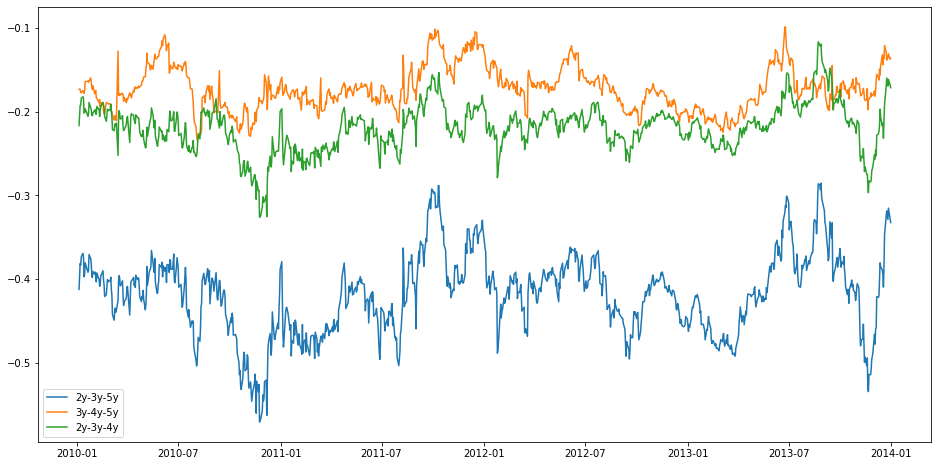

In [8]:
#Draw graphs
plt.figure(figsize=(16,8))
plt.plot(a1)
plt.plot(a2)
plt.plot(a3)
plt.legend(['2y-3y-5y','3y-4y-5y','2y-3y-4y'])

## 2. Let's define z(t, lambda) as {x(t) - EMA( x(t), lambda)} where x(t) is a cointegrated butterfly at t. Use Sample B to construct the following forecasting models: 

#### (1). AR(1):
    x(t) = beta * x(t-1) + Eps(t)
    
#### (2). EMA( x(t), lambda ):  
    EMA(0)=x(0)
    EMA(x(t))=(1-lambda) * EMA(x(t-1)) + lambda * x(t)

- a. AR(1) model fitted to z(t,lambda = 0) (Signal 1), this is a constant mean case<br><br>
     EMA(x(1)) = 1* EMA(x(0)) + 0 =  EMA(x(0)) = x(0)
     Hence, EMA(x(t)) =  1* EMA(x(t-1)) = x(0) <br><br>
     
- b. AR(1) model fitted to z(t,lambda = 0.05) (Signal 2)<br><br>
- c. AR(1) model fitted to z(t, lambda = 0.1) (Signal 3)

**Construct Sample B's cointegrated butterflies using weights computed above.**

In [9]:
# [leg1, belly, leg2]
flylist_1 = ['2y', '3y', '5y']
flylist_2 = ['3y', '4y', '5y' ]
flylist_3 = ['2y', '3y', '4y']

fly_b1=sample_B[flylist_1]
fly_b2=sample_B[flylist_2]
fly_b3=sample_B[flylist_3]

# 2y-3y-5y
b_2y3y5y = fly_b1 @ np.array(W1).reshape(-1,1)

# 3y-4y-5y
b_3y4y5y = fly_b2 @ np.array(W2).reshape(-1,1)

# 2y-3y-4y
b_2y3y4y = fly_b3 @ np.array(W3).reshape(-1,1)

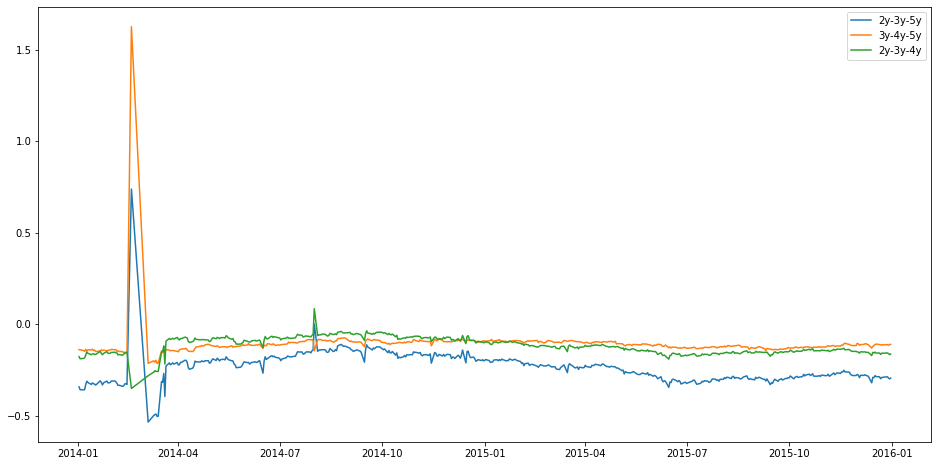

In [10]:
#Draw graphs
plt.figure(figsize=(16,8))
plt.plot(b_2y3y5y)
plt.plot(b_3y4y5y)
plt.plot(b_2y3y4y)
plt.legend(['2y-3y-5y','3y-4y-5y','2y-3y-4y'])

Each model is estimated in a rolling 6m window, and forecast, E[z(t+H)|t], is produced for H=5 days. Note that your forecast for the cointegrated butterffly at t+H will be E[z(t+H)|t]+EMA(t,lambda) (we assume that EMA value won't change in H days)

#### 1). AR(1): <br>
    z(t) = beta * z(t-1) + eps(t)
- E[z(t+1)|t] = E[ beta * z(t) + eps(t+1)] = beta * E[z(t)]
- E[z(t+2)|t] = E[ beta * z(t+1) + eps(t+2)] = beta * E[z(t+1)] = beta * (beta * E[z(t)]) = beta^2 * E[z(t)])<br>
....<br>
- E[z(t+H)|t] = beta^H * E[z(t)])

In [11]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA


def AR_1(lamb, data):
    
    beta=[]
    expected_z=[]
    
    H=5
    window=20*6 # assume 20 business day a month
    
    if lamb!=0:
        ema = data.ewm(alpha=lamb).mean()
        z1 = data-ema
        
    elif lamb==0:
        
        ema = data.iloc[0]
        z1 = data-ema
        ema= data-z1
    
    for i in range(window, len(z1)-H):
        
        # AR(1) run the model from [i-120, i-1](length=120), excluding i-th
        z1_6m = z1.iloc[i-window:i]
        z1_6m.index = pd.DatetimeIndex(z1_6m.index).to_period('D') 
       
        df = z1_6m #Y(t)
        df_lag = z1_6m.shift().dropna() #Y(t-1)
        df1 = df.loc[df_lag.index, :] #Y(t)
       
        model = sm.OLS(df1.values, df_lag.values).fit()
        b = model.params[0]
        
        
        expected_z.append(float(b**H *z1.iloc[i])+ float(ema.iloc[i]))
        beta.append(b)
    
    
    betas=pd.DataFrame(beta, index=z1.iloc[window+H:].index, columns=['Beta'])
    signal=pd.DataFrame(expected_z, index=z1.iloc[window+H:].index, columns=['Forecasted Coint_Fly'])
    
    return betas, signal

In [12]:
# a -> lamba=0 -> when lambda =0, it is a constant mean case
# Signal 1
para_b1_2y3y5y, b1_2y3y5y = AR_1(0,b_2y3y5y)
para_b1_3y4y5y, b1_3y4y5y = AR_1(0,b_3y4y5y)
para_b1_2y3y4y, b1_2y3y4y = AR_1(0,b_2y3y4y)

In [13]:
# b -> lamba=0.05
# Signal 2
para_b2_2y3y5y, b2_2y3y5y = AR_1(0.05,b_2y3y5y)
para_b2_3y4y5y, b2_3y4y5y = AR_1(0.05,b_3y4y5y)
para_b2_2y3y4y, b2_2y3y4y = AR_1(0.05,b_2y3y4y)

In [14]:
# b -> lamba=0.1
# Signal 3
para_s3_2y3y5y, b3_2y3y5y = AR_1(0.1,b_2y3y5y)
para_s3_3y4y5y, b3_3y4y5y = AR_1(0.1,b_3y4y5y)
para_s3_2y3y4y, b3_2y3y4y = AR_1(0.1,b_2y3y4y)

### Plot Signal 1

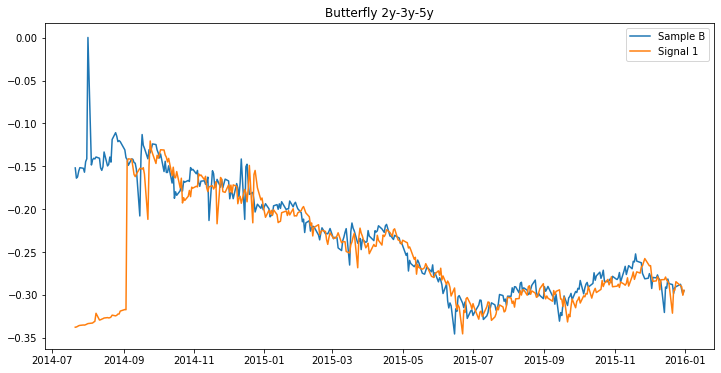

In [15]:
plt.figure(figsize=(12,6))
plt.plot(b_2y3y5y.iloc[120+5:])
plt.plot(b1_2y3y5y)
plt.title('Butterfly 2y-3y-5y')
plt.legend(['Sample B','Signal 1'])

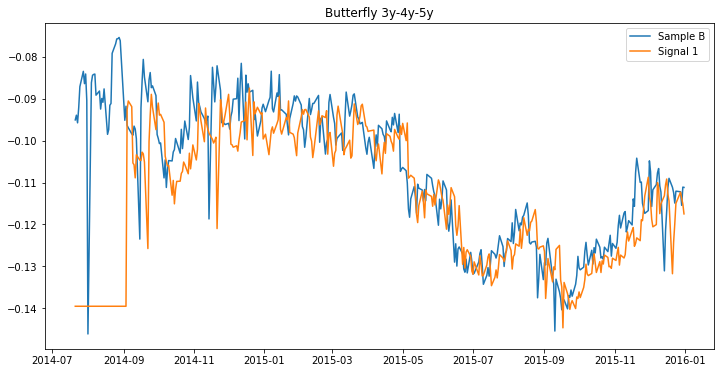

In [16]:
plt.figure(figsize=(12,6))
plt.plot(b_3y4y5y.iloc[120+5:])
plt.plot(b1_3y4y5y)
plt.title('Butterfly 3y-4y-5y')
plt.legend(['Sample B','Signal 1'])

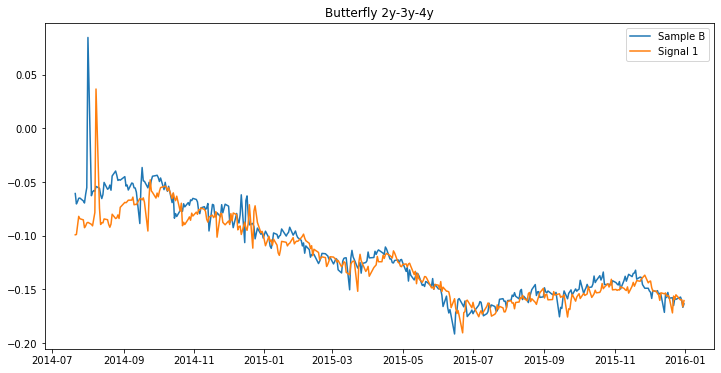

In [17]:
plt.figure(figsize=(12,6))
plt.plot(b_2y3y4y.iloc[120+5:])
plt.plot(b1_2y3y4y)
plt.title('Butterfly 2y-3y-4y')
plt.legend(['Sample B','Signal 1'])

### Plot Signal 2

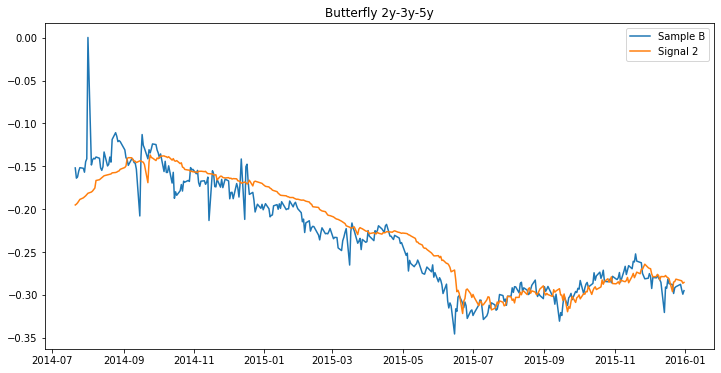

In [18]:
plt.figure(figsize=(12,6))
plt.plot(b_2y3y5y.iloc[120+5:])
plt.plot(b2_2y3y5y)
plt.title('Butterfly 2y-3y-5y')
plt.legend(['Sample B','Signal 2'])

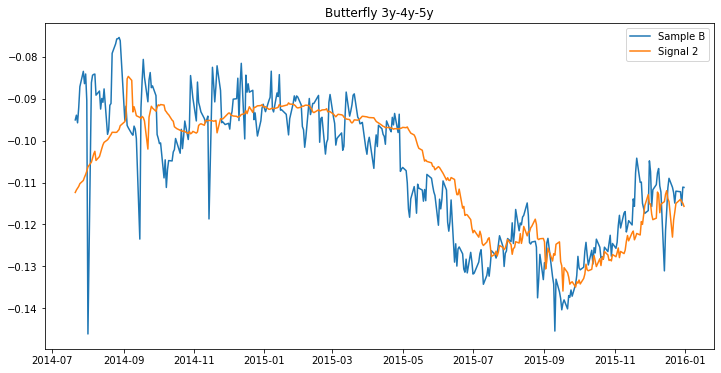

In [19]:
plt.figure(figsize=(12,6))
plt.plot(b_3y4y5y.iloc[120+5:])
plt.plot(b2_3y4y5y)
plt.title('Butterfly 3y-4y-5y')
plt.legend(['Sample B','Signal 2'])

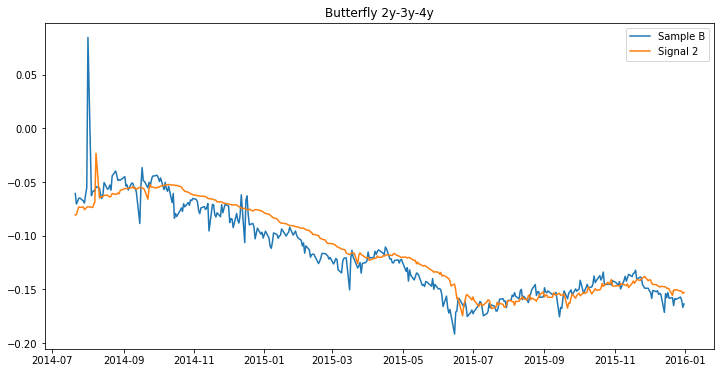

In [20]:
plt.figure(figsize=(12,6))
plt.plot(b_2y3y4y.iloc[120+5:])
plt.plot(b2_2y3y4y)
plt.title('Butterfly 2y-3y-4y')
plt.legend(['Sample B','Signal 2'])

### Plot Signal 3

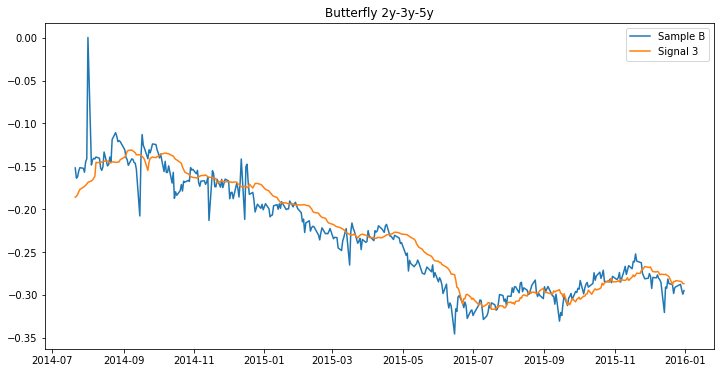

In [21]:
plt.figure(figsize=(12,6))
plt.plot(b_2y3y5y.iloc[120+5:])
plt.plot(b3_2y3y5y)
plt.title('Butterfly 2y-3y-5y')
plt.legend(['Sample B','Signal 3'])

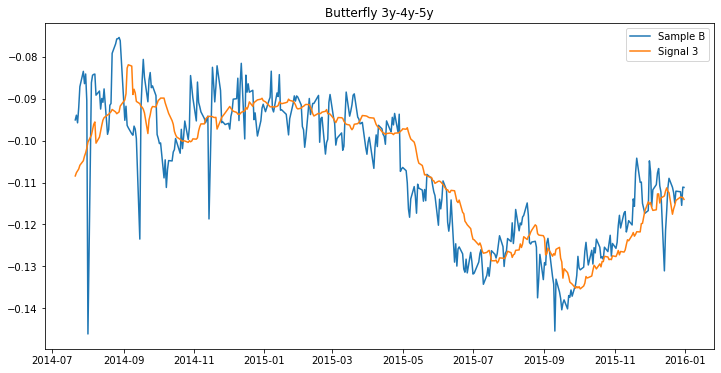

In [22]:
plt.figure(figsize=(12,6))
plt.plot(b_3y4y5y.iloc[120+5:])
plt.plot(b3_3y4y5y)
plt.title('Butterfly 3y-4y-5y')
plt.legend(['Sample B','Signal 3'])

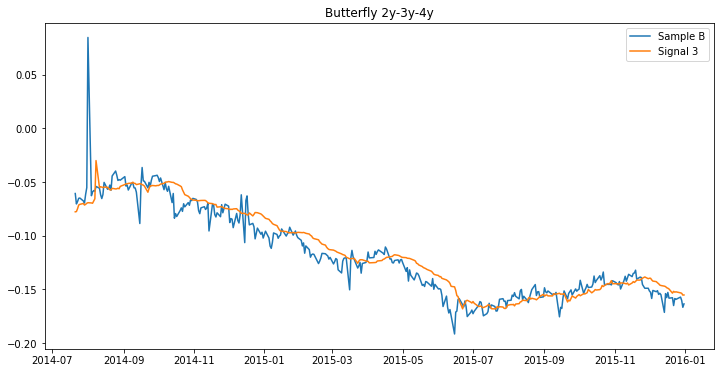

In [23]:
plt.figure(figsize=(12,6))
plt.plot(b_2y3y4y.iloc[120+5:])
plt.plot(b3_2y3y4y)
plt.title('Butterfly 2y-3y-4y')
plt.legend(['Sample B','Signal 3'])

## 3. EXTRA CREDIT: Can you suggest a method of combining Signals 1, 2 & 3? Call the combination (or mixture of signals) Signal 
I will find the optimzied weights for all signals, and use this optimzied weights and 3 signals to compute the mixture of signal, called signal 4.

Signal 4 = Weight_1 * Signal 1 + Weight_2 * Signal_2 + Weight_3 * Signal_3


In [24]:
def Opt(signal_1, signal_2, signal_3, realized):
    
    # Initial weights
    init_weight=np.ones(3)*(1/3)
    
    # Optimize funtion
    def rmse(weights):
        
        signal_4 = signal_1 * weights[0] + signal_2 * weights[1] + signal_3 * weights[2] 
        res1 = np.sqrt(mean_squared_error(realized.iloc[120+5:], signal_4))
        
        return res1
    
    result = minimize(fun=rmse,x0=init_weight)
    return result.x

In [25]:
opt_w_2y3y5y = Opt(b1_2y3y5y,b2_2y3y5y,b3_2y3y5y,b_2y3y5y)
opt_w_3y4y5y = Opt(b1_3y4y5y,b2_3y4y5y,b3_3y4y5y,b_3y4y5y)
opt_w_2y3y4y = Opt(b1_2y3y4y,b2_2y3y4y,b3_2y3y4y,b_2y3y4y)

In [26]:
print('The optimized weights of Signal 4 for 2y-3y-5y butterfly is: ',opt_w_2y3y5y,'\n')
print('The optimized weights of Signal 4 for 3y-4y-5y butterfly is: ',opt_w_3y4y5y,'\n')
print('The optimized weights of Signal 4 for 2y-3y-4y butterfly is: ',opt_w_2y3y4y,'\n')

The optimized weights of Signal 4 for 2y-3y-5y butterfly is:  [-0.05003573 -0.59559184  1.66185923] 

The optimized weights of Signal 4 for 3y-4y-5y butterfly is:  [-0.06854845 -0.44145578  1.51569773] 

The optimized weights of Signal 4 for 2y-3y-4y butterfly is:  [ 0.20971597 -1.08731185  1.87799322] 



In [27]:
b4_2y3y5y = b1_2y3y5y*opt_w_2y3y5y[0] + b2_2y3y5y*opt_w_2y3y5y[1] + b3_2y3y5y*opt_w_2y3y5y[2]
b4_3y4y5y = b1_3y4y5y*opt_w_3y4y5y[0] + b2_3y4y5y*opt_w_3y4y5y[1] + b3_3y4y5y*opt_w_3y4y5y[2]
b4_2y3y4y = b1_2y3y4y*opt_w_2y3y4y[0] + b2_2y3y4y*opt_w_2y3y4y[1] + b3_2y3y4y*opt_w_2y3y4y[2]

### Plot Signal 4

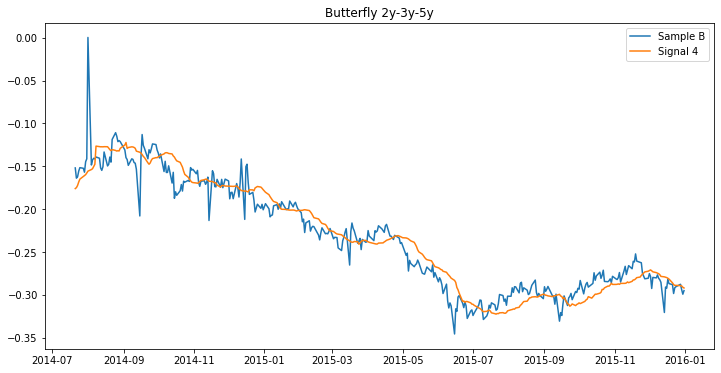

In [28]:
plt.figure(figsize=(12,6))
plt.plot(b_2y3y5y.iloc[120+5:])
plt.plot(b4_2y3y5y)
plt.title('Butterfly 2y-3y-5y')
plt.legend(['Sample B','Signal 4'])

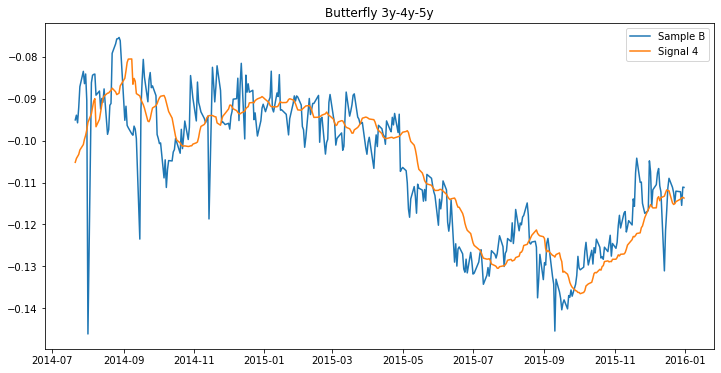

In [29]:
plt.figure(figsize=(12,6))
plt.plot(b_3y4y5y.iloc[120+5:])
plt.plot(b4_3y4y5y)
plt.title('Butterfly 3y-4y-5y')
plt.legend(['Sample B','Signal 4'])

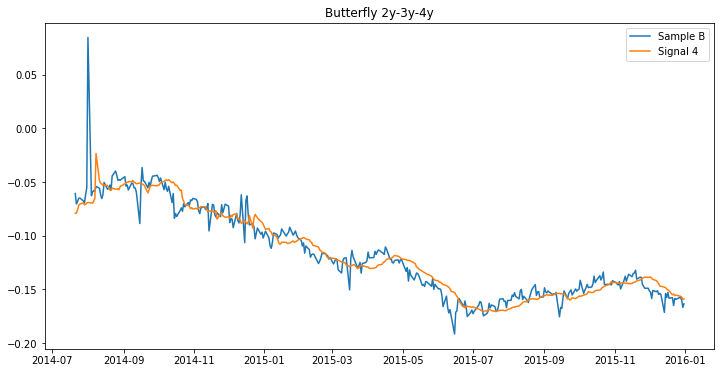

In [30]:
plt.figure(figsize=(12,6))
plt.plot(b_2y3y4y.iloc[120+5:])
plt.plot(b4_2y3y4y)
plt.title('Butterfly 2y-3y-4y')
plt.legend(['Sample B','Signal 4'])

## 4. Define one or two signal quality metrics, and explain clearly what you are implementing. 

- a. Apply signal quality metrics to Signals 1-3 (or Signals 1-4) in the last year of SampleB
- b. Apply signal quality metrics to Signals 1-3 (or Signals 1-4) in Sample C
- c. Compare and analyze your results across signals & samples

###  I would like to choose 1).Rank-Based Correlatio 2).Root Mean Squared Error as my signal quality metrics
1. Rank-Based Correlation : Since we want to check if the forecasted signals is closely follow the real butterfly, the Spearman Rank Correlation can help us test the correlation. Here we don't use linear correlation because the goal is not to see the linear relationship instead to measure the strength and direction of association between two ranked variable. If the correlation is high, I would say the signal qaulity is good, meaning high association of the predicted signal model.
2. Root Mean Squared Error: RMSE can help us see the error between the predicted signals and the actual signal. If RMSE is low, the accuracy of the model is high because the error is small and predicted signals is close to the actual one.



In [31]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

#Rank-Based Correlation evaluates the correlation between realized rates and forecasted rates
def rank_based_corr(actual, forecasted):

    res = spearmanr(actual, forecasted)
    print("1. Rank-Based Correlation(Spearman): ")
    print('Correlation: ', res.correlation)
    print('p-value:', res.pvalue)

#RMSE test for evaluating error between realized rates and forecasted rates
def rmse(actual, forecasted):

    res = mean_squared_error(actual, forecasted)
    print("2. RMSE: ", round(np.sqrt(res),7),'\n')
    

### a. Apply signal quality metrics to Signals 1-3 (or Signals 1-4) in the last year of SampleB

In [32]:
# Signal 1
print('The Signal 1 Quality from Cointegrated Butterfly 2y-3y-5y:')
rank_based_corr(b_2y3y5y['2015-01-01':], b1_2y3y5y['2015-01-01':])
rmse(b_2y3y5y['2015-01-01':], b1_2y3y5y['2015-01-01':])

print('The Signal 1 Quality from Cointegrated Butterfly 3y-4y-5y:')
rank_based_corr(b_3y4y5y['2015-01-01':], b1_3y4y5y['2015-01-01':])
rmse(b_3y4y5y['2015-01-01':], b1_3y4y5y['2015-01-01':])

print('The Signal 1 Quality from Cointegrated Butterfly 2y-3y-4y:')
rank_based_corr(b_2y3y4y['2015-01-01':], b1_2y3y4y['2015-01-01':])
rmse(b_2y3y4y['2015-01-01':], b1_2y3y4y['2015-01-01':])
print('----------------------------------------------------------------------')

# Signal 2
print('The Signal 2 Quality from Cointegrated Butterfly 2y-3y-5y:')
rank_based_corr(b_2y3y5y['2015-01-01':], b2_2y3y5y['2015-01-01':])
rmse(b_2y3y5y['2015-01-01':], b2_2y3y5y['2015-01-01':])

print('The Signal 2 Quality from Cointegrated Butterfly 3y-4y-5y:')
rank_based_corr(b_3y4y5y['2015-01-01':], b2_3y4y5y['2015-01-01':])
rmse(b_3y4y5y['2015-01-01':], b2_3y4y5y['2015-01-01':])

print('The Signal 2 Quality from Cointegrated Butterfly 2y-3y-4y:')
rank_based_corr(b_2y3y4y['2015-01-01':], b2_2y3y4y['2015-01-01':])
rmse(b_2y3y4y['2015-01-01':], b2_2y3y4y['2015-01-01':])
print('----------------------------------------------------------------------')

# Signal 3
print('The Signal 3 Quality from Cointegrated Butterfly 2y-3y-5y:')
rank_based_corr(b_2y3y5y['2015-01-01':], b3_2y3y5y['2015-01-01':])
rmse(b_2y3y5y['2015-01-01':], b3_2y3y5y['2015-01-01':])

print('The Signal 3 Quality from Cointegrated Butterfly 3y-4y-5y:')
rank_based_corr(b_3y4y5y['2015-01-01':], b3_3y4y5y['2015-01-01':])
rmse(b_3y4y5y['2015-01-01':], b3_3y4y5y['2015-01-01':])

print('The Signal 3 Quality from Cointegrated Butterfly 2y-3y-4y:')
rank_based_corr(b_2y3y4y['2015-01-01':], b3_2y3y4y['2015-01-01':])
rmse(b_2y3y4y['2015-01-01':], b3_2y3y4y['2015-01-01':])

print('----------------------------------------------------------------------')
# Signal 4
print('The Signal 4 Quality from Cointegrated Butterfly 2y-3y-5y:')
rank_based_corr(b_2y3y5y['2015-01-01':], b4_2y3y5y['2015-01-01':])
rmse(b_2y3y5y['2015-01-01':], b4_2y3y5y['2015-01-01':])

print('The Signal 4 Quality from Cointegrated Butterfly 3y-4y-5y:')
rank_based_corr(b_3y4y5y['2015-01-01':], b4_3y4y5y['2015-01-01':])
rmse(b_3y4y5y['2015-01-01':], b4_3y4y5y['2015-01-01':])

print('The Signal 4 Quality from Cointegrated Butterfly 2y-3y-4y:')
rank_based_corr(b_2y3y4y['2015-01-01':], b4_2y3y4y['2015-01-01':])
rmse(b_2y3y4y['2015-01-01':], b4_2y3y4y['2015-01-01':])

The Signal 1 Quality from Cointegrated Butterfly 2y-3y-5y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.9189074681886046
p-value: 5.537434181538427e-103
2. RMSE:  0.0130193 

The Signal 1 Quality from Cointegrated Butterfly 3y-4y-5y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.8817198737517463
p-value: 1.5490199723272241e-83
2. RMSE:  0.0066377 

The Signal 1 Quality from Cointegrated Butterfly 2y-3y-4y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.9042842370401698
p-value: 2.1639750570804678e-94
2. RMSE:  0.0086883 

----------------------------------------------------------------------
The Signal 2 Quality from Cointegrated Butterfly 2y-3y-5y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.8926019993056197
p-value: 1.8129078942620593e-88
2. RMSE:  0.0180929 

The Signal 2 Quality from Cointegrated Butterfly 3y-4y-5y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.8722984965839635
p-value: 1.2098126333600613e-79
2. RMSE:  0.0070933 

The Signa

### Analysis for Sample B:
From the above signal quality metrics, all the rank-based correlations from different signals model and different butterflies are larger than 0.85, meaning that our signal model have high association with the cointegrated Butterfly. Moreover, RMSEs are low, so we could say these 4 signal models have accurate prediction. From my opnion, the reason we have good prediction may be that we use the rolling wondiw to forecast the next 5 day butterfly rates, so it can help us update the parameter everday and build the signal from the mos trecent data.



### b. Apply signal quality metrics to Signals 1-3 (or Signals 1-4) in Sample C

In [33]:
# [leg1, belly, leg2]
flylist_1 = ['2y', '3y', '5y']
flylist_2 = ['3y', '4y', '5y' ]
flylist_3 = ['2y', '3y', '4y']

fly_C1=sample_C[flylist_1]
fly_C2=sample_C[flylist_2]
fly_C3=sample_C[flylist_3]

c_2y3y5y = fly_C1 @ np.array(W1).reshape(-1,1)
c_3y4y5y = fly_C2 @ np.array(W2).reshape(-1,1)
c_2y3y4y = fly_C3 @ np.array(W3).reshape(-1,1)


In [34]:
# Signal 1 -> lamba=0 -> a constant mean case

para_c1_2y3y5y, c1_2y3y5y = AR_1(0,c_2y3y5y)
para_c1_3y4y5y, c1_3y4y5y = AR_1(0,c_3y4y5y)
para_c1_2y3y4y, c1_2y3y4y = AR_1(0,c_2y3y4y)

# Signal 2 -> lamba=0.05
para_c2_2y3y5y, c2_2y3y5y = AR_1(0.05,c_2y3y5y)
para_c2_3y4y5y, c2_3y4y5y = AR_1(0.05,c_3y4y5y)
para_c2_2y3y4y, c2_2y3y4y = AR_1(0.05,c_2y3y4y)

# Signal 3 -> lamba=0.1
para_c3_2y3y5y, c3_2y3y5y = AR_1(0.1,c_2y3y5y)
para_c3_3y4y5y, c3_3y4y5y = AR_1(0.1,c_3y4y5y)
para_c3_2y3y4y, c3_2y3y4y = AR_1(0.1,c_2y3y4y)


In [35]:
# Signal 4
opt_w_c2y3y5y = Opt(c1_2y3y5y,c2_2y3y5y,c3_2y3y5y,c_2y3y5y)
opt_w_c3y4y5y = Opt(c1_3y4y5y,c2_3y4y5y,c3_3y4y5y,c_3y4y5y)
opt_w_c2y3y4y = Opt(c1_2y3y4y,c2_2y3y4y,c3_2y3y4y,c_2y3y4y)
print('The optimized weights of Signal 4 for 2y-3y-5y butterfly is: ',opt_w_c2y3y5y,'\n')
print('The optimized weights of Signal 4 for 3y-4y-5y butterfly is: ',opt_w_c3y4y5y,'\n')
print('The optimized weights of Signal 4 for 2y-3y-4y butterfly is: ',opt_w_c2y3y4y,'\n')


The optimized weights of Signal 4 for 2y-3y-5y butterfly is:  [ 0.51051166 -0.42067044  0.91928658] 

The optimized weights of Signal 4 for 3y-4y-5y butterfly is:  [ 0.67078901 -1.07270985  1.39941071] 

The optimized weights of Signal 4 for 2y-3y-4y butterfly is:  [ 0.52084086 -0.56331657  1.0534471 ] 



In [36]:
c4_2y3y5y = c1_2y3y5y*opt_w_c2y3y5y[0] + c2_2y3y5y*opt_w_c2y3y5y[1] + c3_2y3y5y*opt_w_c2y3y5y[2]
c4_3y4y5y = c1_3y4y5y*opt_w_c3y4y5y[0] + c2_3y4y5y*opt_w_c3y4y5y[1] + c3_3y4y5y*opt_w_c3y4y5y[2]
c4_2y3y4y = c1_2y3y4y*opt_w_c2y3y4y[0] + c2_2y3y4y*opt_w_c2y3y4y[1] + c3_2y3y4y*opt_w_c2y3y4y[2]

### Plot Signal 1 

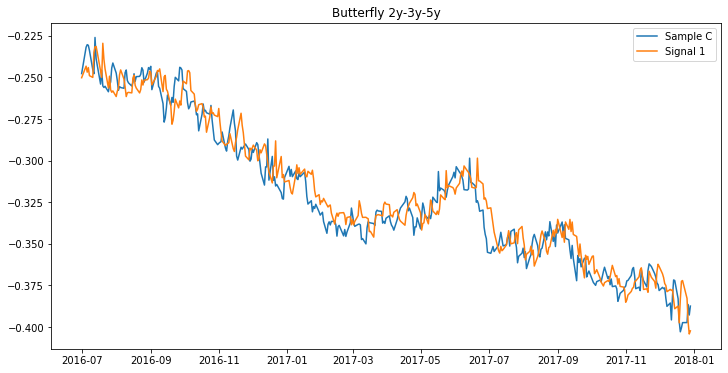

In [37]:
plt.figure(figsize=(12,6))
plt.plot(c_2y3y5y.iloc[120+5:])
plt.plot(c1_2y3y5y)
plt.title('Butterfly 2y-3y-5y')
plt.legend(['Sample C','Signal 1'])

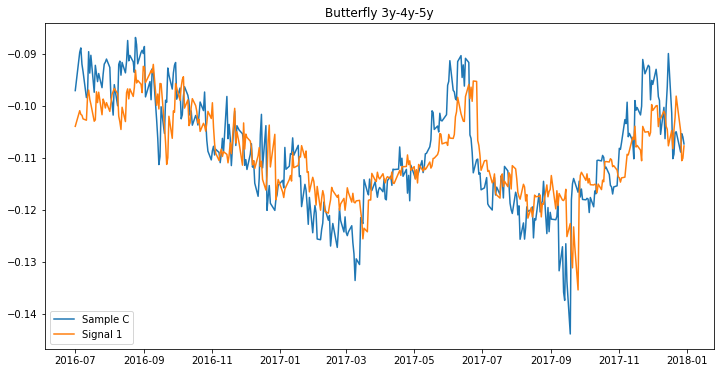

In [38]:
plt.figure(figsize=(12,6))
plt.plot(c_3y4y5y.iloc[120+5:])
plt.plot(c1_3y4y5y)
plt.title('Butterfly 3y-4y-5y')
plt.legend(['Sample C','Signal 1'])

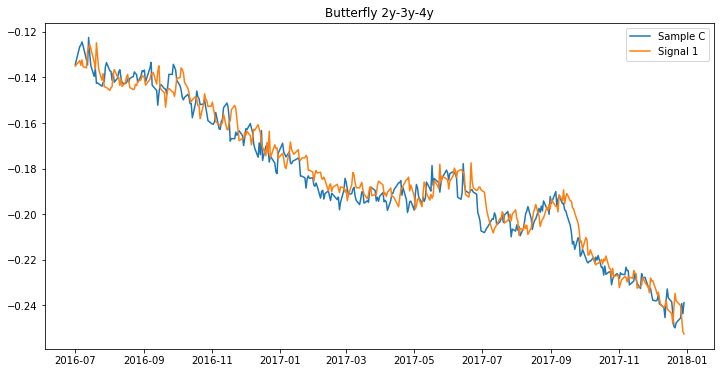

In [39]:
plt.figure(figsize=(12,6))
plt.plot(c_2y3y4y.iloc[120+5:])
plt.plot(c1_2y3y4y)
plt.title('Butterfly 2y-3y-4y')
plt.legend(['Sample C','Signal 1'])

### Plot Signal 2

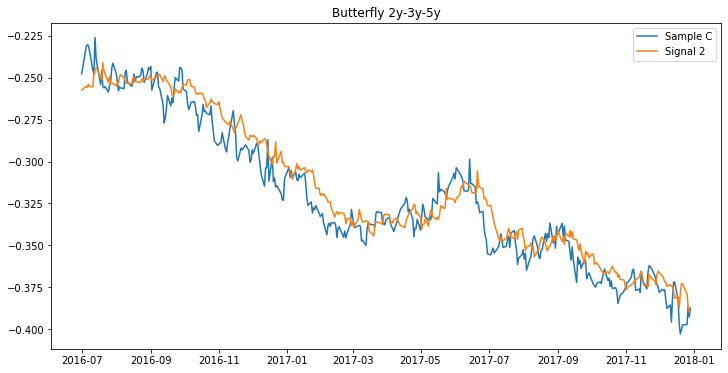

In [40]:
plt.figure(figsize=(12,6))
plt.plot(c_2y3y5y.iloc[120+5:])
plt.plot(c2_2y3y5y)
plt.title('Butterfly 2y-3y-5y')
plt.legend(['Sample C','Signal 2'])

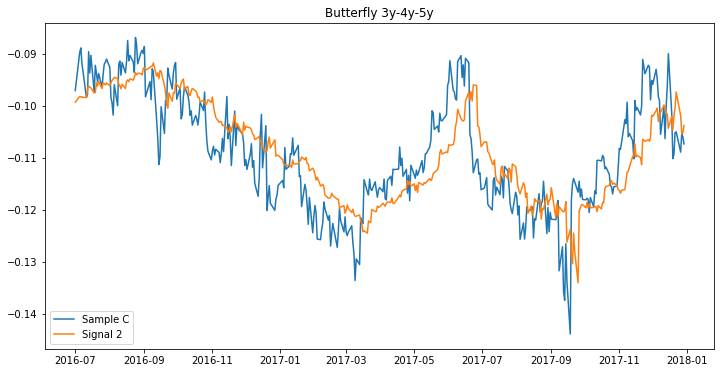

In [41]:
plt.figure(figsize=(12,6))
plt.plot(c_3y4y5y.iloc[120+5:])
plt.plot(c2_3y4y5y)
plt.title('Butterfly 3y-4y-5y')
plt.legend(['Sample C','Signal 2'])

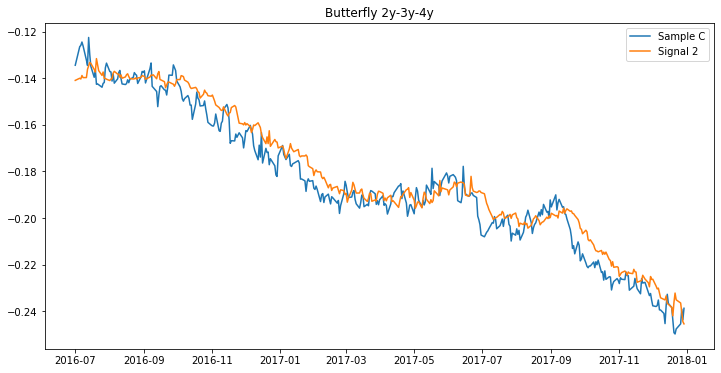

In [42]:
plt.figure(figsize=(12,6))
plt.plot(c_2y3y4y.iloc[120+5:])
plt.plot(c2_2y3y4y)
plt.title('Butterfly 2y-3y-4y')
plt.legend(['Sample C','Signal 2'])

### Plot Signal 3

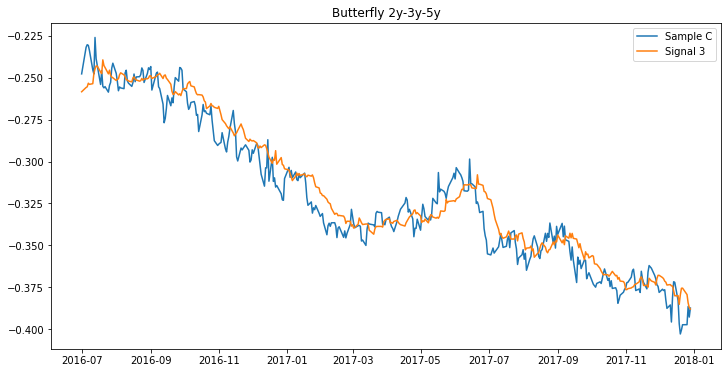

In [43]:
plt.figure(figsize=(12,6))
plt.plot(c_2y3y5y.iloc[120+5:])
plt.plot(c3_2y3y5y)
plt.title('Butterfly 2y-3y-5y')
plt.legend(['Sample C','Signal 3'])

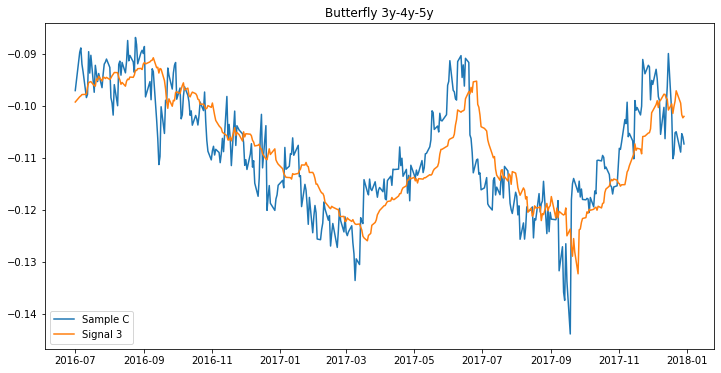

In [44]:
plt.figure(figsize=(12,6))
plt.plot(c_3y4y5y.iloc[120+5:])
plt.plot(c3_3y4y5y)
plt.title('Butterfly 3y-4y-5y')
plt.legend(['Sample C','Signal 3'])

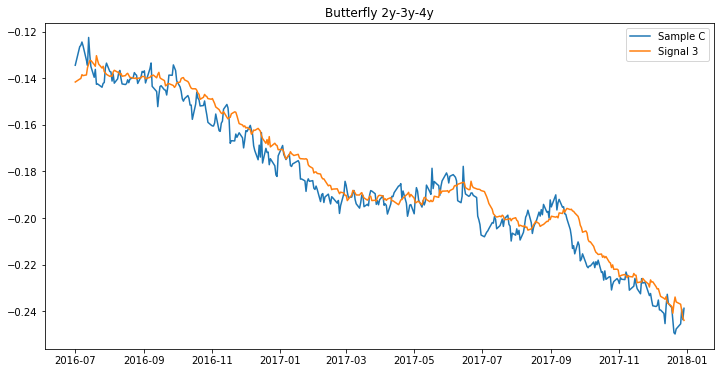

In [45]:
plt.figure(figsize=(12,6))
plt.plot(c_2y3y4y.iloc[120+5:])
plt.plot(c3_2y3y4y)
plt.title('Butterfly 2y-3y-4y')
plt.legend(['Sample C','Signal 3'])

### Plot Signal 4

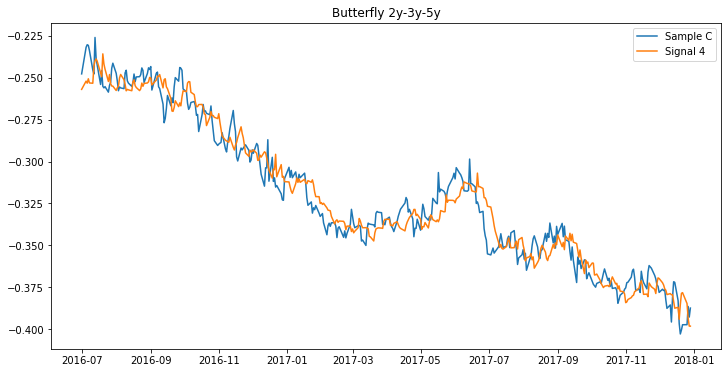

In [46]:
plt.figure(figsize=(12,6))
plt.plot(c_2y3y5y.iloc[120+5:])
plt.plot(c4_2y3y5y)
plt.title('Butterfly 2y-3y-5y')
plt.legend(['Sample C','Signal 4'])

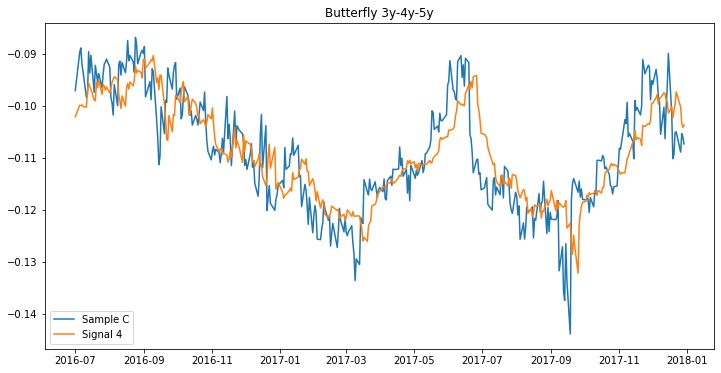

In [47]:
plt.figure(figsize=(12,6))
plt.plot(c_3y4y5y.iloc[120+5:])
plt.plot(c4_3y4y5y)
plt.title('Butterfly 3y-4y-5y')
plt.legend(['Sample C','Signal 4'])

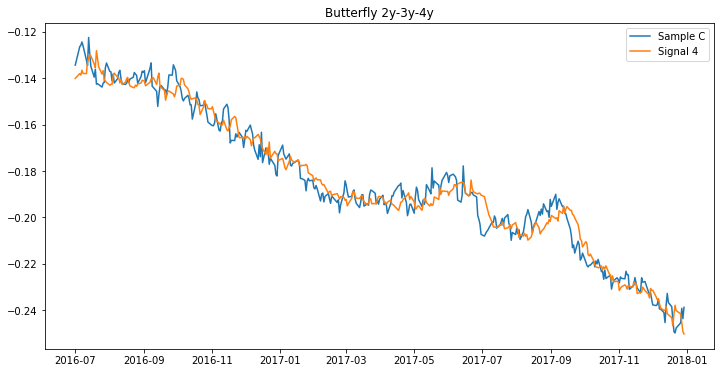

In [48]:
plt.figure(figsize=(12,6))
plt.plot(c_2y3y4y.iloc[120+5:])
plt.plot(c4_2y3y4y)
plt.title('Butterfly 2y-3y-4y')
plt.legend(['Sample C','Signal 4'])

In [49]:
# Signal 1
print('The Signal 1 Quality from Cointegrated Butterfly 2y-3y-5y:')
rank_based_corr(c_2y3y5y.iloc[120+5:], c1_2y3y5y)
rmse(c_2y3y5y.iloc[120+5:], c1_2y3y5y)

print('The Signal 1 Quality from Cointegrated Butterfly 3y-4y-5y:')
rank_based_corr(c_3y4y5y.iloc[120+5:], c1_3y4y5y)
rmse(c_3y4y5y.iloc[120+5:], c1_3y4y5y)

print('The Signal 1 Quality from Cointegrated Butterfly 2y-3y-4y:')
rank_based_corr(c_2y3y4y.iloc[120+5:], c1_2y3y4y)
rmse(c_2y3y4y.iloc[120+5:], c1_2y3y4y)
print('----------------------------------------------------------------------')

# Signal 2
print('The Signal 2 Quality from Cointegrated Butterfly 2y-3y-5y:')
rank_based_corr(c_2y3y5y.iloc[120+5:], c2_2y3y5y)
rmse(c_2y3y5y.iloc[120+5:], c2_2y3y5y)

print('The Signal 2 Quality from Cointegrated Butterfly 3y-4y-5y:')
rank_based_corr(c_3y4y5y.iloc[120+5:], c2_3y4y5y)
rmse(c_3y4y5y.iloc[120+5:], c2_3y4y5y)

print('The Signal 2 Quality from Cointegrated Butterfly 2y-3y-4y:')
rank_based_corr(c_2y3y4y.iloc[120+5:], c2_2y3y4y)
rmse(c_2y3y4y.iloc[120+5:], c2_2y3y4y)
print('----------------------------------------------------------------------')

# Signal 3
print('The Signal 3 Quality from Cointegrated Butterfly 2y-3y-5y:')
rank_based_corr(c_2y3y5y.iloc[120+5:], c3_2y3y5y)
rmse(c_2y3y5y.iloc[120+5:], c3_2y3y5y)

print('The Signal 3 Quality from Cointegrated Butterfly 3y-4y-5y:')
rank_based_corr(c_3y4y5y.iloc[120+5:], c3_3y4y5y['2015-01-01':])
rmse(c_3y4y5y.iloc[120+5:], c3_3y4y5y['2015-01-01':])

print('The Signal 3 Quality from Cointegrated Butterfly 2y-3y-4y:')
rank_based_corr(c_2y3y4y.iloc[120+5:], c3_2y3y4y)
rmse(c_2y3y4y.iloc[120+5:], c3_2y3y4y)
print('----------------------------------------------------------------------')

# Signal 4
print('The Signal 4 Quality from Cointegrated Butterfly 2y-3y-5y:')
rank_based_corr(c_2y3y5y.iloc[120+5:], c4_2y3y5y)
rmse(c_2y3y5y.iloc[120+5:], c4_2y3y5y)

print('The Signal 4 Quality from Cointegrated Butterfly 3y-4y-5y:')
rank_based_corr(c_3y4y5y.iloc[120+5:], c4_3y4y5y['2015-01-01':])
rmse(c_3y4y5y.iloc[120+5:], c4_3y4y5y['2015-01-01':])

print('The Signal 4 Quality from Cointegrated Butterfly 2y-3y-4y:')
rank_based_corr(c_2y3y4y.iloc[120+5:], c4_2y3y4y)
rmse(c_2y3y4y.iloc[120+5:], c4_2y3y4y)


The Signal 1 Quality from Cointegrated Butterfly 2y-3y-5y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.9609237394698227
p-value: 7.825802816646258e-212
2. RMSE:  0.0108452 

The Signal 1 Quality from Cointegrated Butterfly 3y-4y-5y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.8415900055423301
p-value: 1.2702352077741527e-102
2. RMSE:  0.0065975 

The Signal 1 Quality from Cointegrated Butterfly 2y-3y-4y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.9623605905108953
p-value: 7.832340341278757e-215
2. RMSE:  0.0063058 

----------------------------------------------------------------------
The Signal 2 Quality from Cointegrated Butterfly 2y-3y-5y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.9575074689259022
p-value: 3.942978299614871e-205
2. RMSE:  0.0113824 

The Signal 2 Quality from Cointegrated Butterfly 3y-4y-5y:
1. Rank-Based Correlation(Spearman): 
Correlation:  0.7966601378483829
p-value: 3.144527209328383e-84
2. RMSE:  0.0067867 

The Signa

### Analysis for Sample C:
The results are similar to the sample B's results. The above signal quality metrics shows that all the rank-based correlations from different signals model and different butterflies are larger than 0.8, meaning that our signal model have high association with the cointegrated Butterfly. Besides, all RMSEs are low, so we could say these 4 signal models have good prediction and significant high accuracy.

### c. Compare and analyze your results across signals & samples

#### Results across Signals & sample B

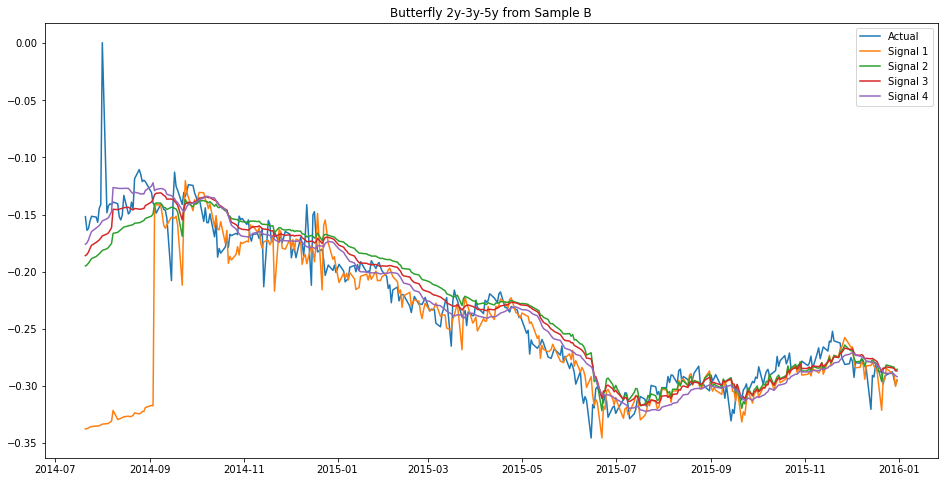

In [50]:
plt.figure(figsize=(16,8))
plt.plot(b_2y3y5y.iloc[120+5:])
plt.plot(b1_2y3y5y)
plt.plot(b2_2y3y5y)
plt.plot(b3_2y3y5y)
plt.plot(b4_2y3y5y)
plt.title('Butterfly 2y-3y-5y from Sample B')
plt.legend(['Actual','Signal 1','Signal 2','Signal 3','Signal 4'])

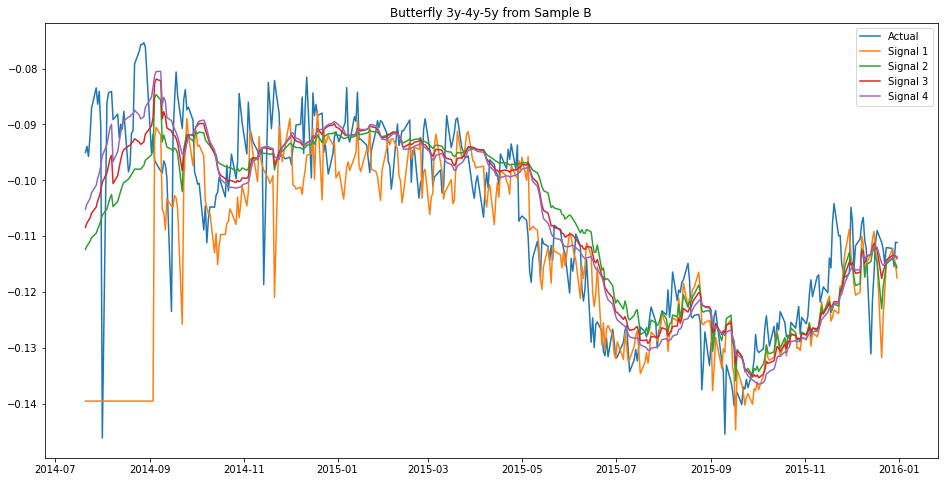

In [51]:
plt.figure(figsize=(16,8))
plt.plot(b_3y4y5y.iloc[120+5:])
plt.plot(b1_3y4y5y)
plt.plot(b2_3y4y5y)
plt.plot(b3_3y4y5y)
plt.plot(b4_3y4y5y)
plt.title('Butterfly 3y-4y-5y from Sample B')
plt.legend(['Actual','Signal 1','Signal 2','Signal 3','Signal 4'])

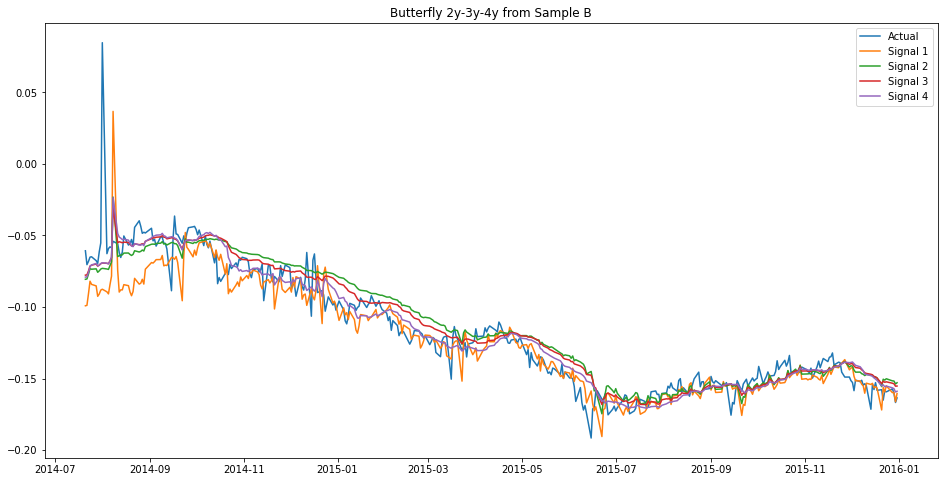

In [52]:
plt.figure(figsize=(16,8))
plt.plot(b_2y3y4y.iloc[120+5:])
plt.plot(b1_2y3y4y)
plt.plot(b2_2y3y4y)
plt.plot(b3_2y3y4y)
plt.plot(b4_2y3y4y)
plt.title('Butterfly 2y-3y-4y from Sample B')
plt.legend(['Actual','Signal 1','Signal 2','Signal 3','Signal 4'])

#### Results across Signals & sample C

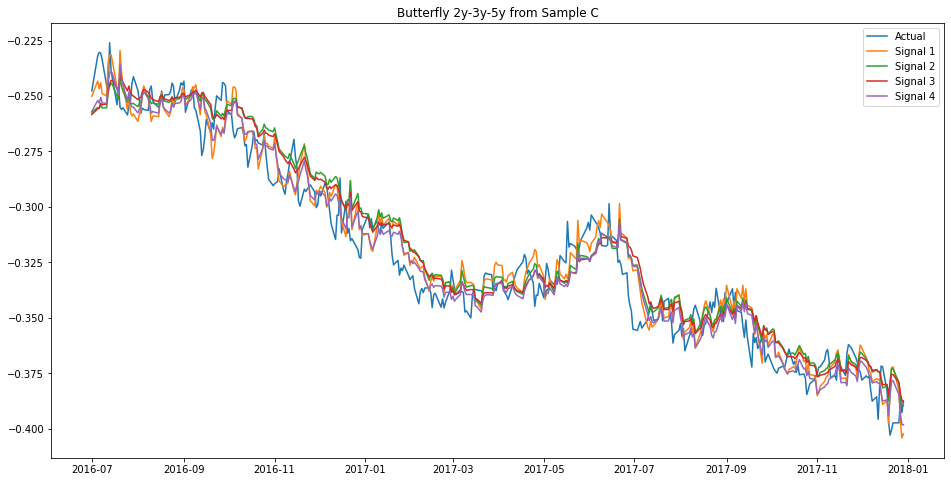

In [53]:
plt.figure(figsize=(16,8))
plt.plot(c_2y3y5y.iloc[120+5:])
plt.plot(c1_2y3y5y)
plt.plot(c2_2y3y5y)
plt.plot(c3_2y3y5y)
plt.plot(c4_2y3y5y)
plt.title('Butterfly 2y-3y-5y from Sample C')
plt.legend(['Actual','Signal 1','Signal 2','Signal 3','Signal 4'])

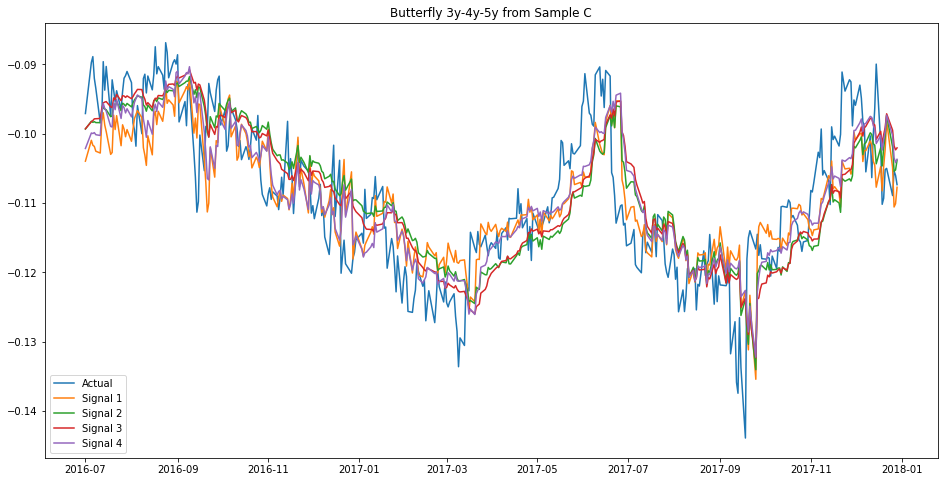

In [54]:
plt.figure(figsize=(16,8))
plt.plot(c_3y4y5y.iloc[120+5:])
plt.plot(c1_3y4y5y)
plt.plot(c2_3y4y5y)
plt.plot(c3_3y4y5y)
plt.plot(c4_3y4y5y)
plt.title('Butterfly 3y-4y-5y from Sample C')
plt.legend(['Actual','Signal 1','Signal 2','Signal 3','Signal 4'])

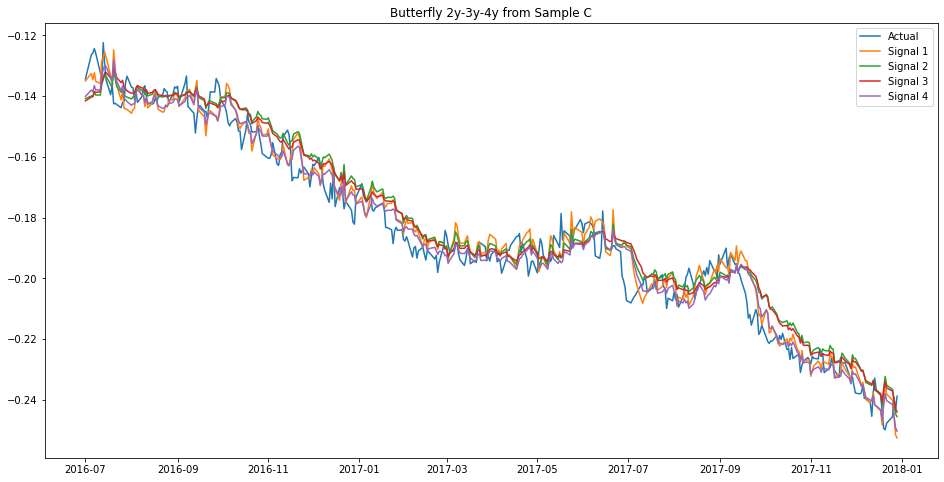

In [55]:
plt.figure(figsize=(16,8))
plt.plot(c_2y3y4y.iloc[120+5:])
plt.plot(c1_2y3y4y)
plt.plot(c2_2y3y4y)
plt.plot(c3_2y3y4y)
plt.plot(c4_2y3y4y)
plt.title('Butterfly 2y-3y-4y from Sample C')
plt.legend(['Actual','Signal 1','Signal 2','Signal 3','Signal 4'])

**1. Comparison and Analysis among samples**

- From the quality metrics and results analysis writen on 4-a and 4-b, we can conclude that both Sample B and Sample C can be forecasted accurately since the model shows high correlationa and low RMSE. 
- The season why all 4 models have good predicted results is that we use rolling widow to forecast the next 5 days butterfly rates, so the parameter is computed and updated everyday using the most recent data. 
- Hence, we may say that all models can be used and have good prediction in differeent time periods.

**2. Comparison and Analysis among signals**

- Since the signal 1 is the constant mean case, giving no weights to the historical data, the forecast is very sensetive.
- The forecasts of signal 2 and signal 3 are stable than signal 1.
- Because the signal 4 is the linear combination of signal 1, 2, and 3, so it's forecast is senstive than signal 2 and 3 but stable than signal 1.

In [56]:
print('Done')

Done
